<a href="https://colab.research.google.com/github/flaviorv/ml_clustering/blob/main/clustering_at.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

In [15]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

###Analisys of Mall Customers dataset and K-Means clustering

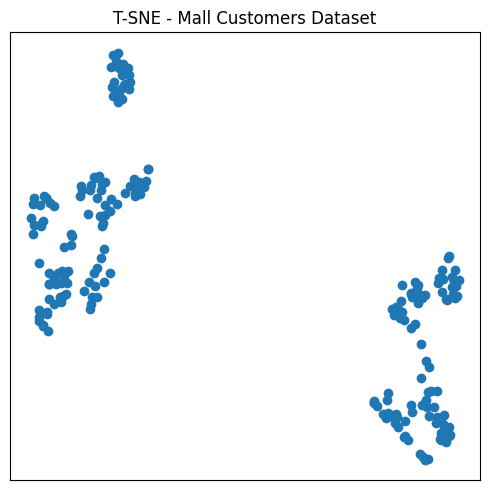

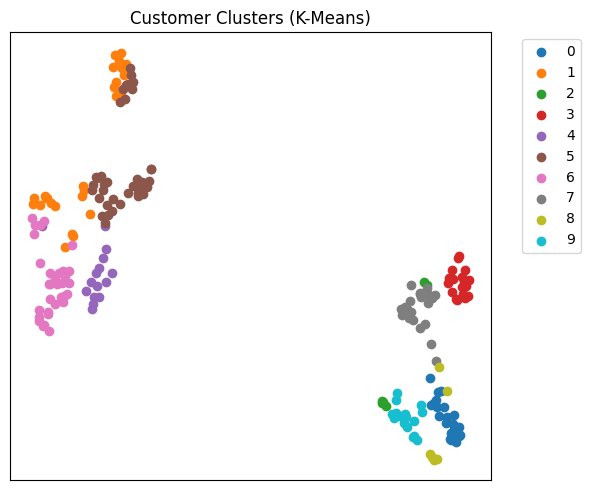

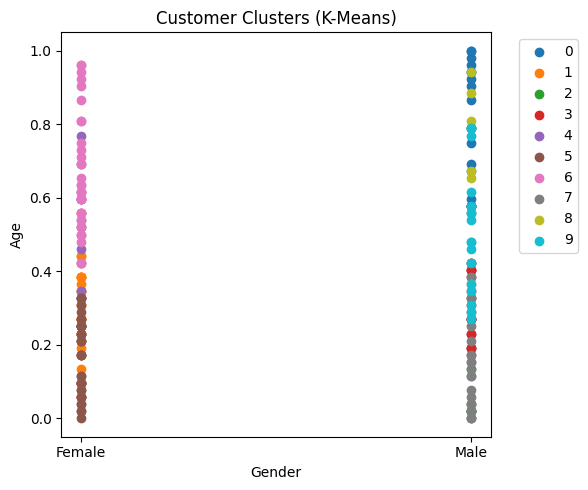

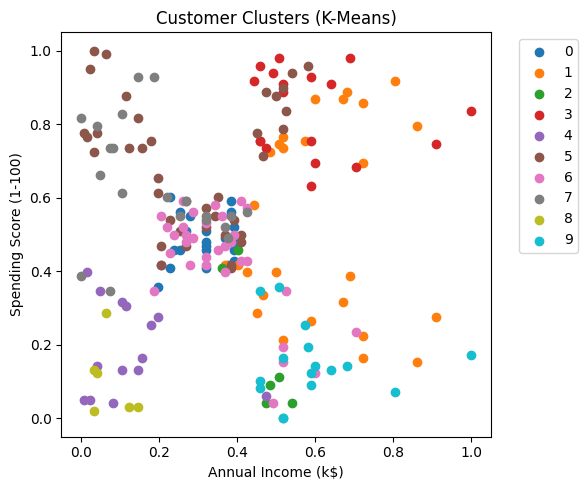

In [18]:
warnings.filterwarnings('ignore')

# Loading dataset Mall Custormers
data = pd.read_csv('https://raw.githubusercontent.com/flaviorv/ml_clustering/refs/heads/main/datasets/Mall_Customers.csv')

# Feature engineering
gender_map = {'Female': 0, 'Male': 1}
data['Gender'] = data['Gender'].map(gender_map)

x = data.dropna()
x = x.drop(columns=['CustomerID'], axis=1)

binary = ['Gender']
continuous = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = MinMaxScaler()
x[continuous] =  scaler.fit_transform(x[continuous])

# Configs
n_clusters = 10
perplexity = 25
cmap='tab10'
colors = plt.cm.get_cmap('tab10', n_clusters).colors

# Dimensionality reduciton with T-SNE for charts ploting
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
x_tsne = tsne.fit_transform(x)
plt.figure(figsize=(5,5))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('T-SNE - Mall Customers Dataset')
plt.tight_layout()
plt.show()

# Clustering with K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42, algorithm='elkan')
clusters = kmeans.fit_predict(x)

# Show clusters
plt.figure(figsize=(6,5))
for c in range(n_clusters):
  plt.scatter(x_tsne[clusters==c, 0], x_tsne[clusters==c, 1], c=colors[c], label=c)
plt.title('Customer Clusters (K-Means)')
plt.xticks([])
plt.yticks([])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Show clusters by features (Gender and Age)
plt.figure(figsize=(6,5))
for c in range(n_clusters):
  plt.scatter(x['Gender'][clusters==c], x['Age'][clusters==c], c=colors[c], label=c)
plt.xlabel('Gender')
plt.xticks([0 , 1], ['Female', 'Male'])
plt.ylabel('Age')
plt.title('Customer Clusters (K-Means)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Show clusters by features (Annual Income and Spending Score)
plt.figure(figsize=(6,5))
for c in range(n_clusters):
  plt.scatter(x['Annual Income (k$)'][clusters==c], x['Spending Score (1-100)'][clusters==c], c=colors[c], label=c)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Clusters (K-Means)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###K-Means vs PCA dimensionality reduction

In [13]:
# Dimensionality reduction with K-Means and PCA
print("\nVector quantization analysis (K-Means)")
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=x.columns)
print(centroids_df)

print('\nPCA analysis')
pca = PCA(n_components=2)
pca_labels = ['P Component 1', 'P Component 2']
components = pca.fit_transform(x)
components_df = pd.DataFrame(components, columns=pca_labels)
print(components_df)

print('\nDimensiolanity reduction - PCA vs K-Means')
print('Original shape:', x.shape)
print('K-Means shape:', centroids_df.shape)
print('PCA shape:', components_df.shape)


Vector quantization analysis (K-Means)
         Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.000000e+00  0.766484            0.316159                0.484937
1  5.551115e-17  0.324786            0.607165                0.535147
2  1.000000e+00  0.038462            0.461749                0.192177
3  1.000000e+00  0.293803            0.591075                0.833333
4 -1.665335e-16  0.442308            0.127322                0.206122
5  1.665335e-16  0.163968            0.283218                0.693072
6  1.110223e-16  0.676683            0.361168                0.433355
7  1.000000e+00  0.138278            0.194379                0.634597
8  1.000000e+00  0.721154            0.073770                0.103741
9  1.000000e+00  0.503606            0.593238                0.148597

PCA analysis
     P Component 1  P Component 2
0         0.532955      -0.227841
1         0.513939      -0.493080
2        -0.446266       0.087079
3        -0.478796      -0.366617
4     

###Agglomerative Clustering

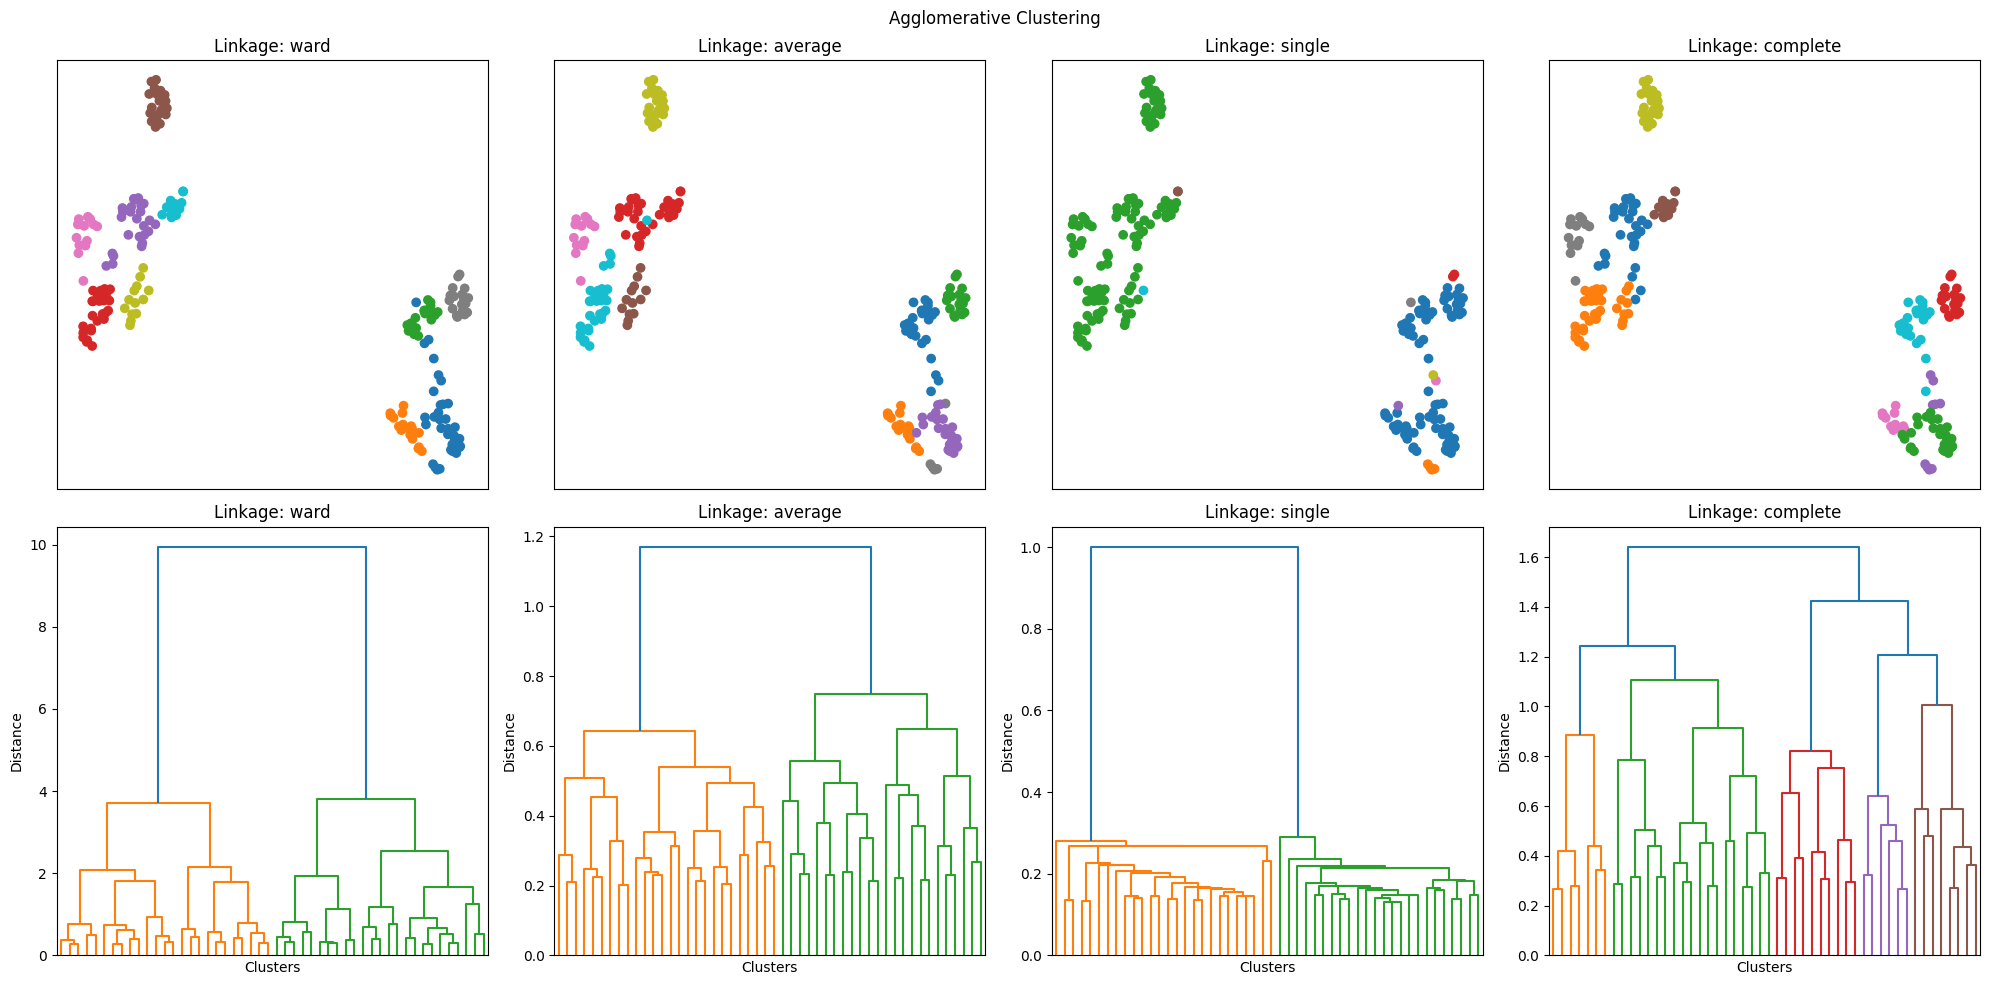

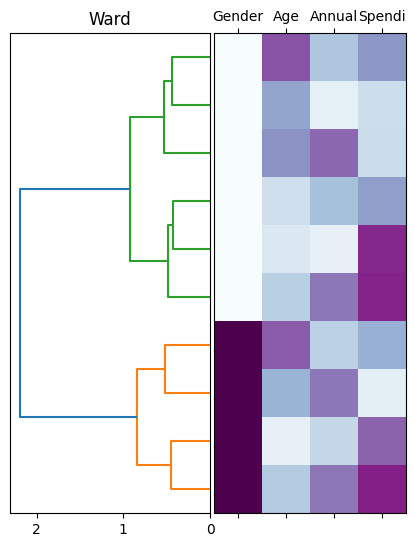

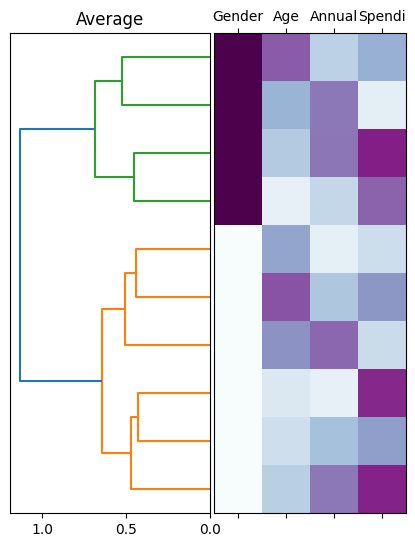

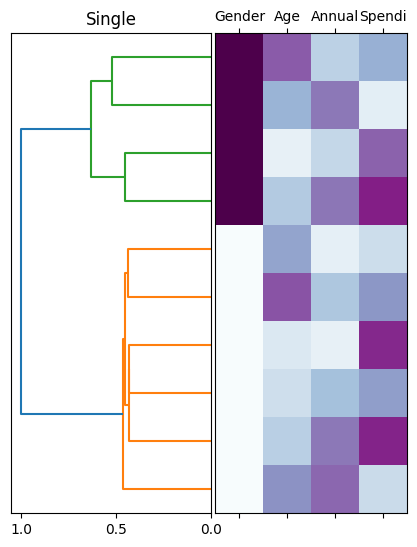

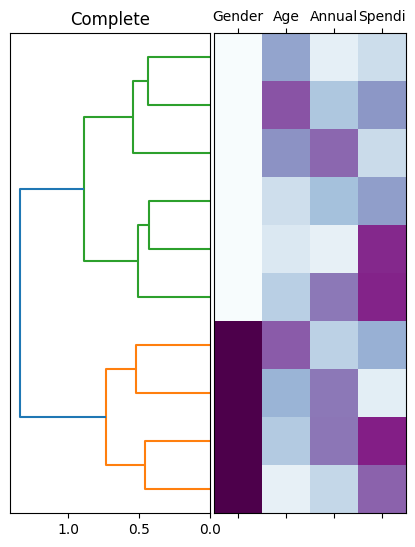

In [19]:
# Agglomerative Clustering

linkages = ['ward', 'average', 'single', 'complete']

fig, ax = plt.subplots(2, 4, figsize=(20,10))
for i, l in enumerate(linkages):
  ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=l)
  ac.fit(x)
  labels = ac.labels_

  # Clusters - scatter plot
  ax[0, i].scatter(x_tsne[:, 0], x_tsne[:, 1], c=labels, cmap=cmap)
  ax[0, i].set_xticks([])
  ax[0, i].set_yticks([])
  ax[0, i].set_title(f'Linkage: {l}')

  # Dendrogram
  lin = linkage(x, l)
  dendrogram(lin, orientation='top', truncate_mode='lastp', ax=ax[1,i], p=50)
  ax[1, i].set_xlabel('Clusters')
  ax[1, i].set_ylabel('Distance')
  ax[1, i].set_title(f'Linkage: {l}')
  ax[1, i].set_xticks([])
plt.suptitle('Agglomerative Clustering')
plt.tight_layout()
plt.show()

# dendrogram with heatmap
df = pd.DataFrame(x, columns=x.columns)
n_prune = 10

for l in linkages:
  lin = linkage(df, l)
  labels = fcluster(lin, t=n_prune, criterion='maxclust')
  df['cluster'] = labels
  pruned = df.groupby('cluster').mean()

  set_labels = True

  # dendrogram
  fig = plt.figure(figsize=(10, 8), facecolor='white')
  axd = fig.add_axes([0.24, 0.1, 0.2, 0.6])
  lin = linkage(pruned, l)
  den = dendrogram(lin, labels=pruned.index, orientation='left', no_labels=not set_labels)
  sorted = pruned.iloc[den['leaves'][::-1]]

  # heatmap
  axm = fig.add_axes([0.24, 0.1, 0.6, 0.6])
  cax = axm.matshow(sorted,  interpolation='nearest', cmap='BuPu')
  axm.set_yticks([])
  if (set_labels):
    axm.set_xticks(np.arange(sorted.shape[1]))
    short_labels = [col[:6] for col in sorted.columns]
    axm.set_xticklabels(short_labels)
  else:
    axm.set_xticks([])
  axd.set_title(l.capitalize())
  plt.show()

###DBSCAN

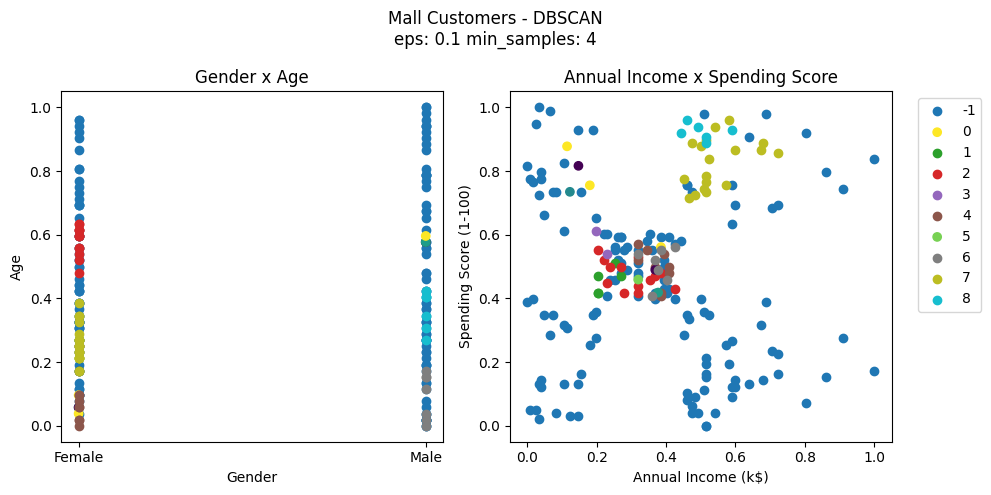

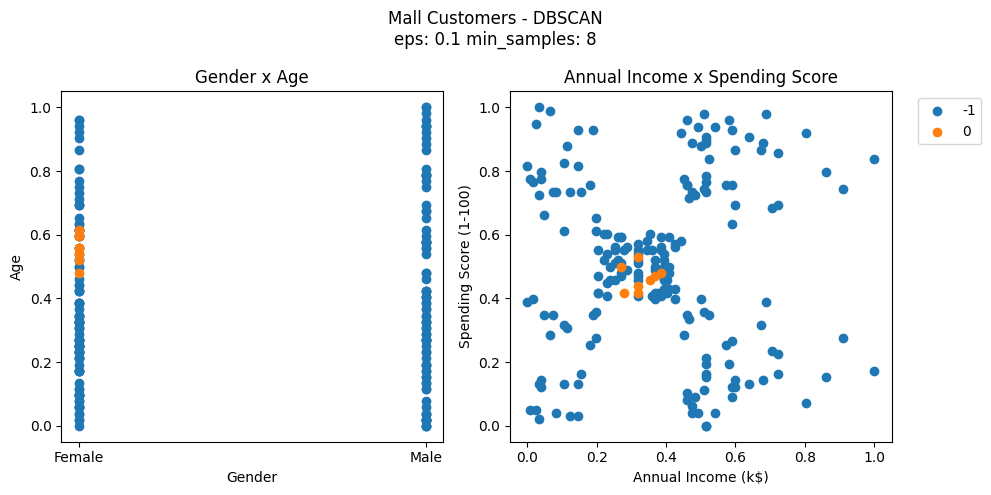

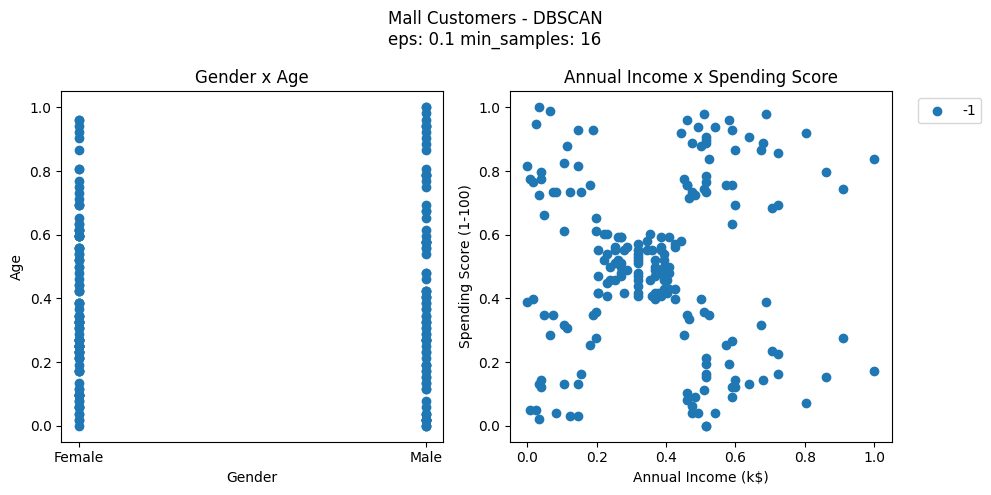

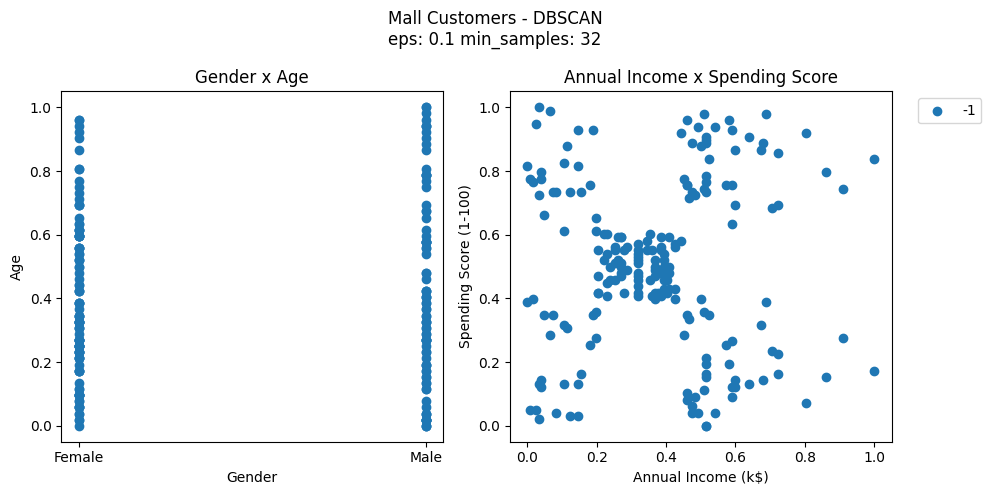

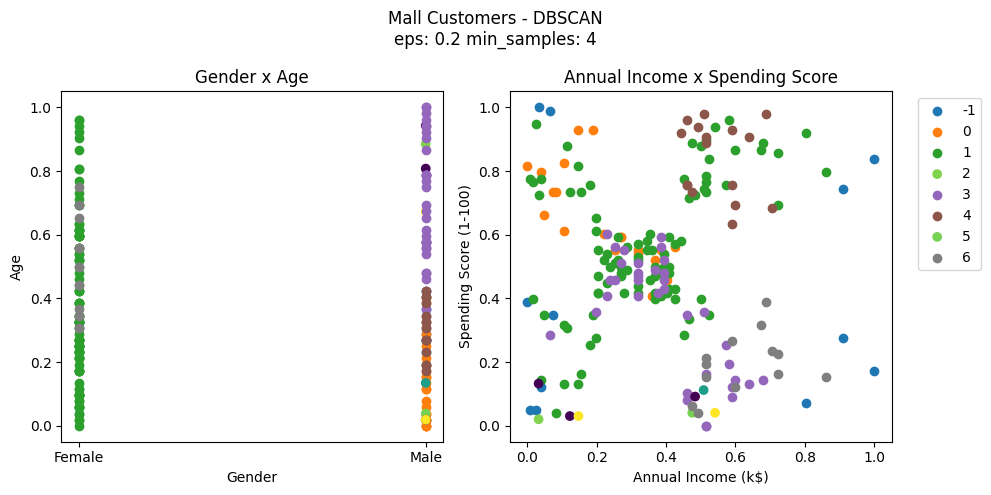

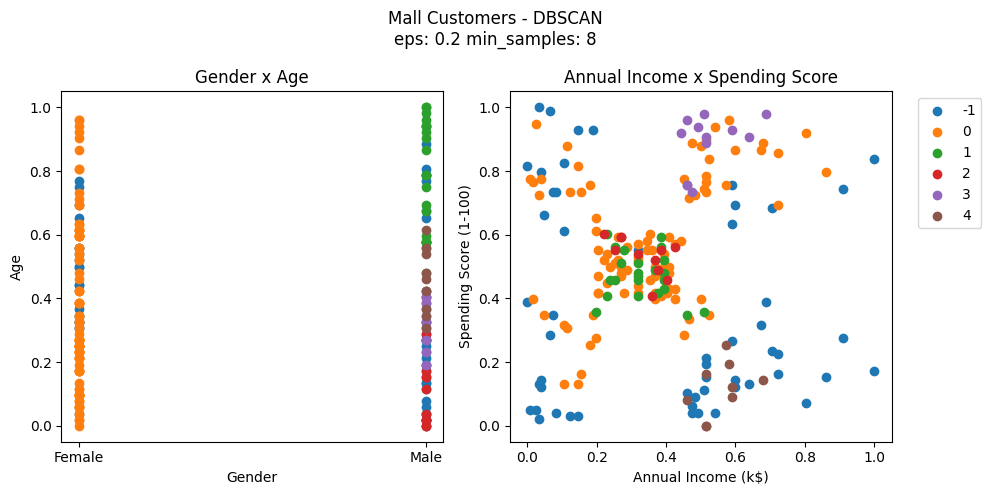

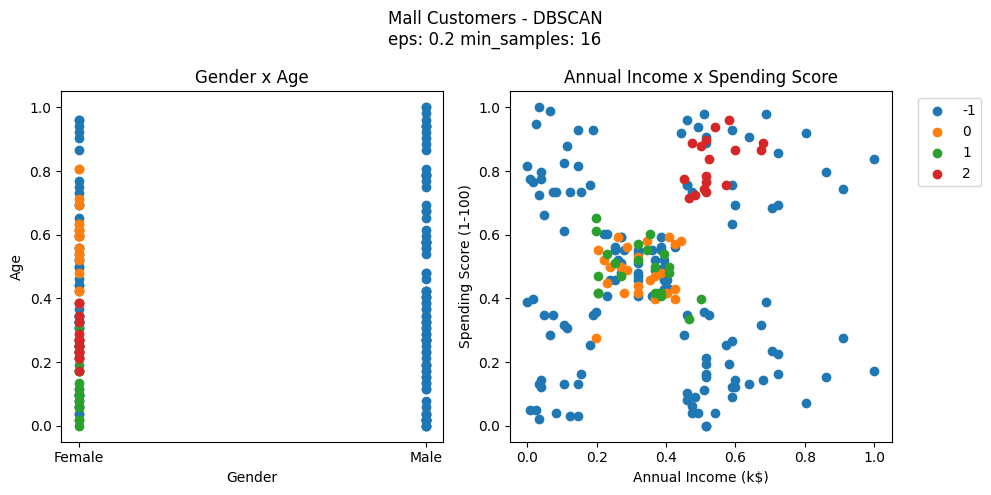

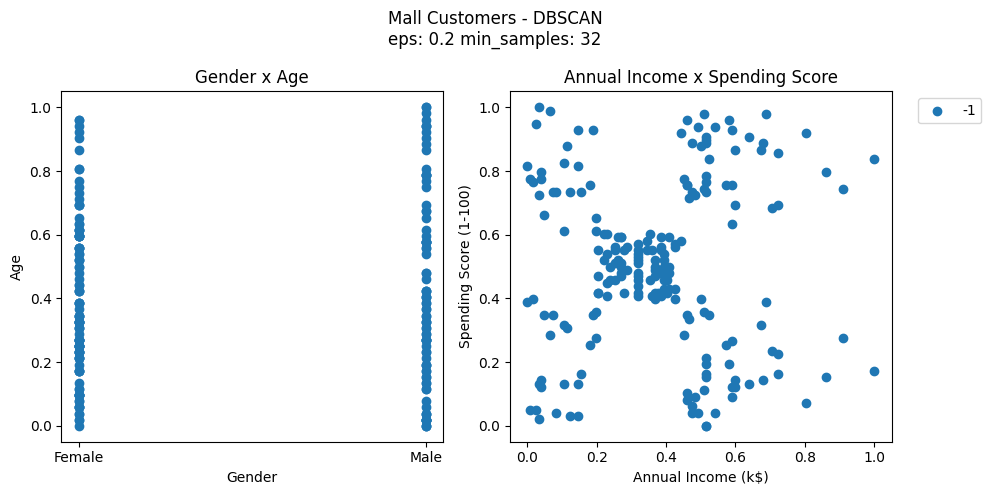

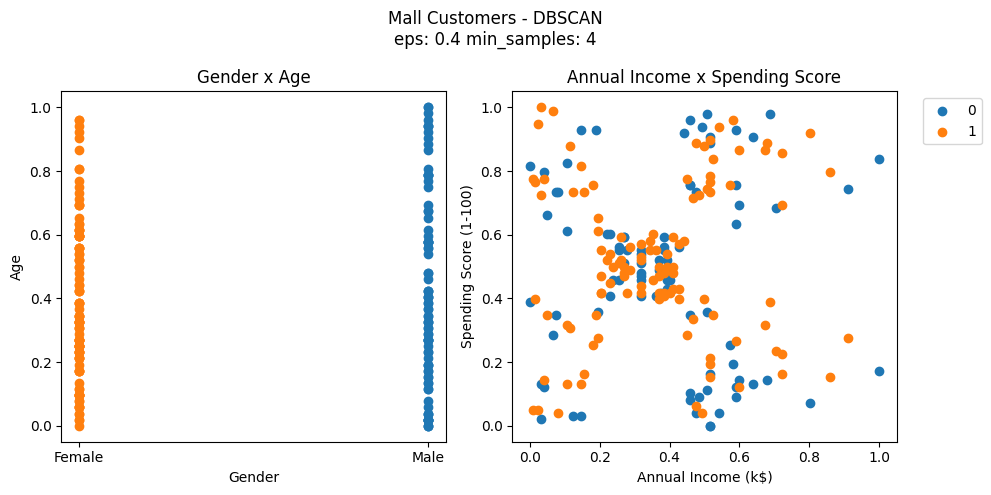

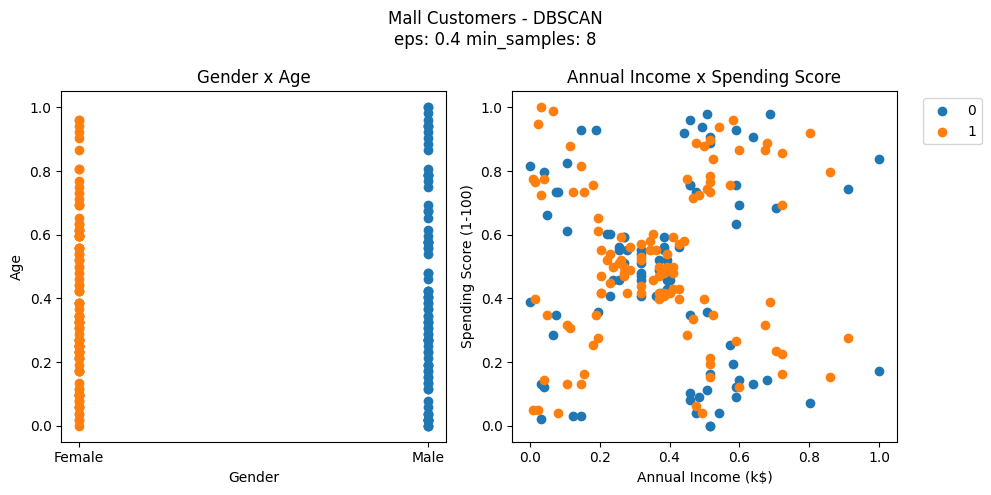

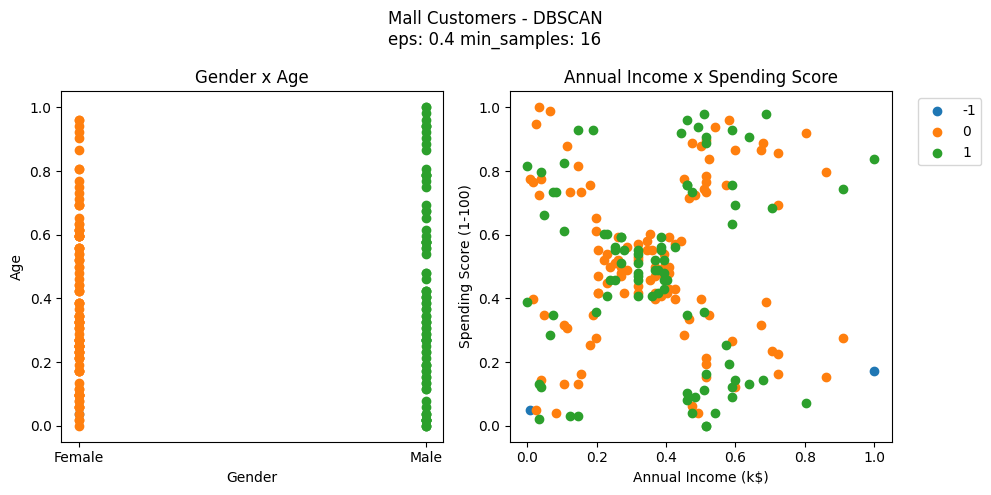

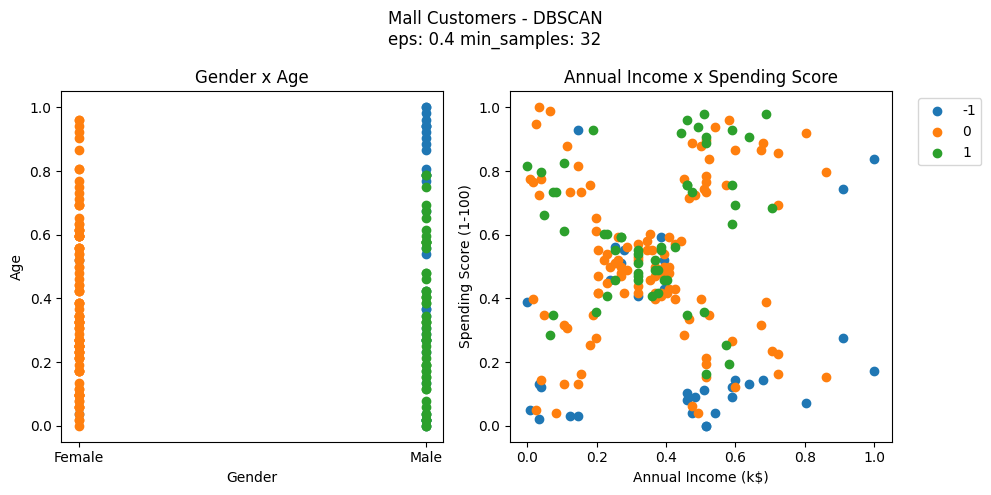

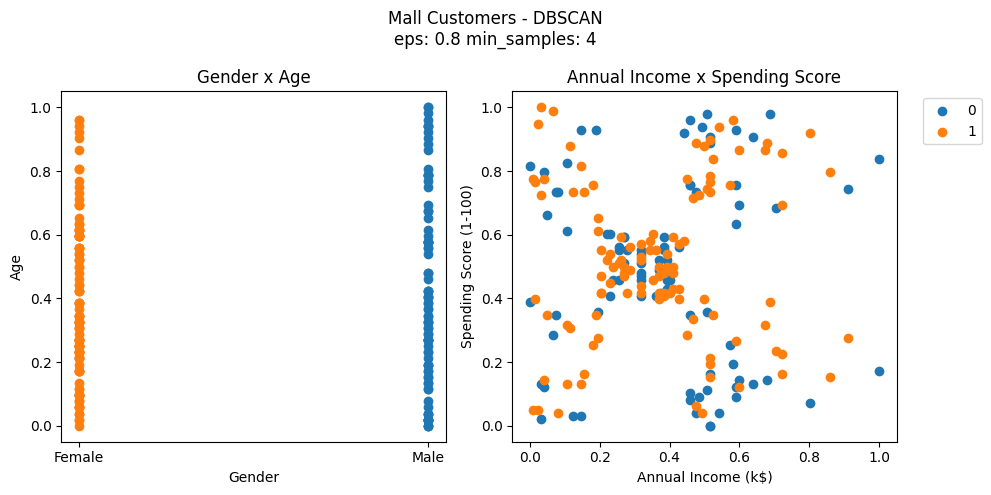

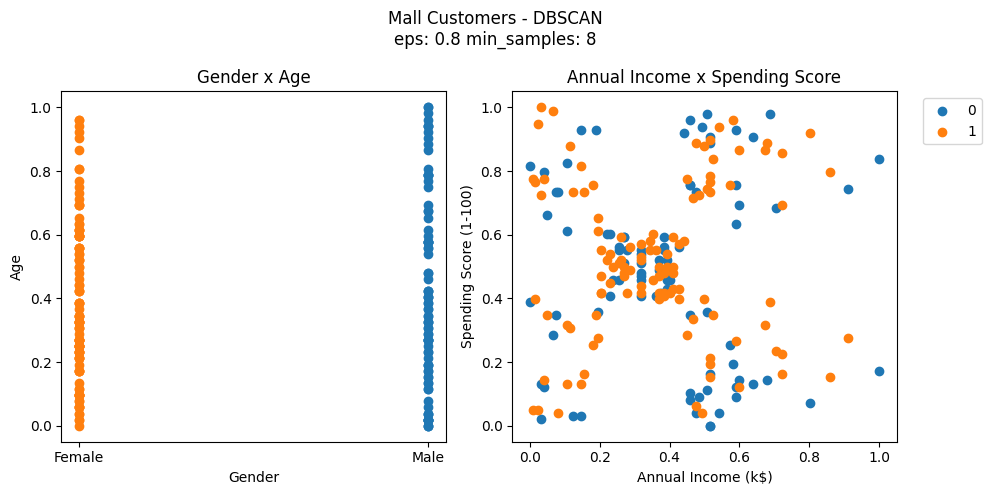

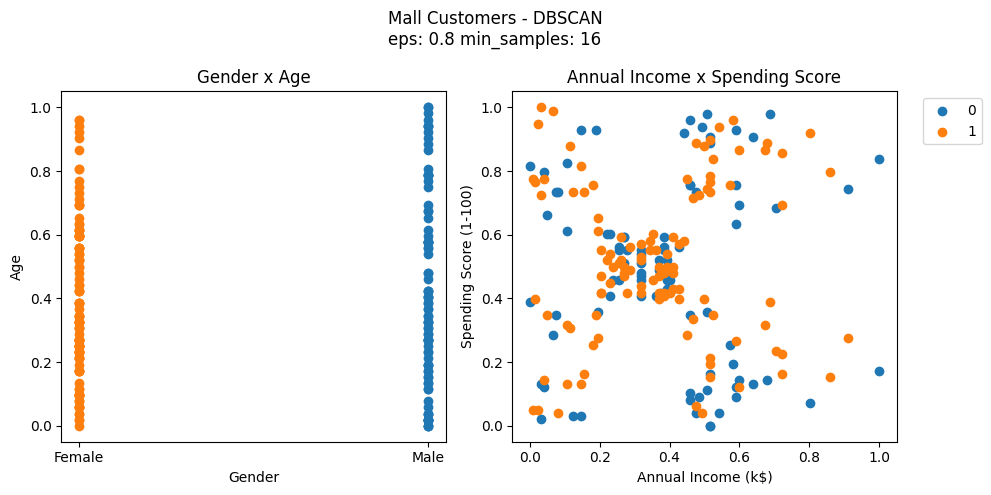

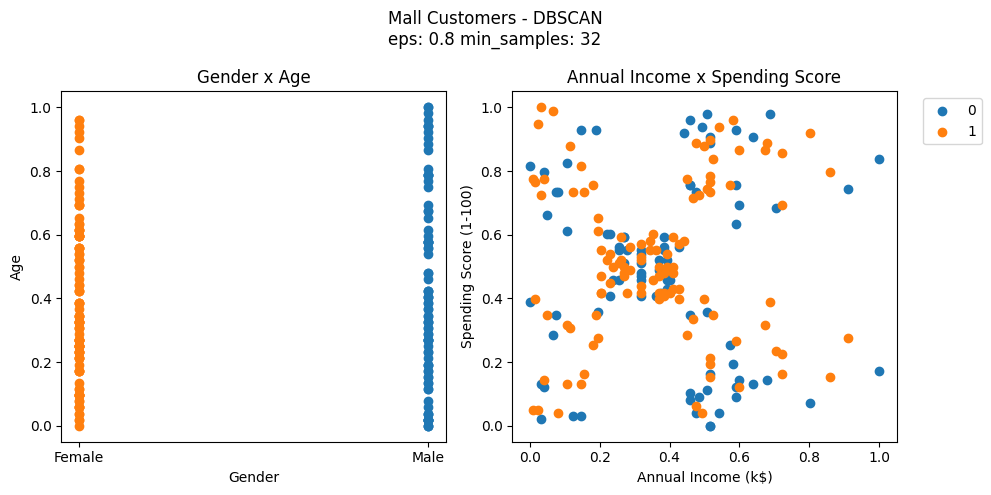

In [22]:
# Mall Customers with DBSCAN
eps = [0.1, 0.2, 0.4, 0.8]
min_samples = [4, 8, 16, 32]
for e in eps:
  for ms in min_samples:
    dbscan = DBSCAN(eps=e, min_samples=ms)
    labels = dbscan.fit_predict(x)
    clusters = np.unique(labels)
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    # Show clusters by features (Gender and Age)
    for i, c in enumerate(clusters):
      ax[0].scatter(x['Gender'][labels==c], x['Age'][labels==c], c=colors[i], label=c)
    ax[0].set_xlabel('Gender')
    ax[0].set_xticks([0 , 1], ['Female', 'Male'])
    ax[0].set_ylabel('Age')
    ax[0].set_title('Gender x Age')

    # Show clusters by features (Annual Income and Spending Score)
    for i, c in enumerate(clusters):
      ax[1].scatter(x['Annual Income (k$)'][labels==c], x['Spending Score (1-100)'][labels==c], c=colors[i], label=c)
    ax[1].set_xlabel('Annual Income (k$)')
    ax[1].set_ylabel('Spending Score (1-100)')
    ax[1].set_title(f'Annual Income x Spending Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.suptitle(f'Mall Customers - DBSCAN\neps: {e} min_samples: {ms}')
    plt.tight_layout()
    plt.show()

###DBSCAN vs K-Measn vs Agglomerative using NMI, ARI and Silhouette metrics

In [23]:
# Using Spending Score as label
y = pd.cut(data['Spending Score (1-100)'], bins=[0, 30, 70, 101], labels=['Low', 'Medium', 'High'])
_x = x.drop(columns=['Spending Score (1-100)']) if 'Spending Score (1-100)' in x.columns else x

# DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=8)
dbscan_labels = dbscan.fit_predict(_x)

# K-Means
kmeans = KMeans(n_clusters=10, random_state=42, algorithm='elkan')
kmeans_labels = kmeans.fit_predict(_x)

# Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=11, linkage='ward')
ac.fit(_x)
ac_labels = ac.labels_

# Printing ARI, NMI and Silhouette Score of each model
all_pred = {'DBSCAN': dbscan_labels, 'K-Means': kmeans_labels, 'Agglomerative Clustering': ac_labels}

for model_name, y_pred in all_pred.items():
  print(model_name)
  print(f'ARI {adjusted_rand_score(y, y_pred):.3f}')
  print(f'NMI {normalized_mutual_info_score(y, y_pred):.3f}')
  print(f'Silhouette {silhouette_score(x, y_pred):.2f}', end='\n\n') if len(np.unique(y_pred)) > 1 else print('No silhouette: less than 2 clusters', end='\n\n')

DBSCAN
ARI 0.007
NMI 0.017
Silhouette 0.41

K-Means
ARI 0.045
NMI 0.111
Silhouette 0.21

Agglomerative Clustering
ARI 0.029
NMI 0.126
Silhouette 0.16

